In [1]:
#####################################################################################################################
#Developed by Jonathan Ojeda 27/4/2021 QAAFI UQ
# Code functionalities:
# Import apsim classic files and compare data from different model structure
#####################################################################################################################

In [1]:
#import libraries
import random as rd
import os
import sqlite3
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import dateutil
import pylab as py
import seaborn as sns
import scipy 
from scipy import stats
import sklearn.metrics
from numpy  import array
import glob
import functools
from functools import reduce
import matplotlib.ticker as ticker
import cartopy.io.shapereader as shpreader
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib as mpl
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

from sklearn.cluster import KMeans

#Extend screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<ipython-input-1-f27bbb6f6f6b>:28: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,


In [19]:
df = pd.read_csv(r'C:\Users\uqjojeda\Dropbox\RanjuPaper2\data\data.csv')
df.columns

Index(['model', 'soil', 'manag', 'env', 'env_soil', 'year', 'TuberYield_1',
       'HarvestTuberWt_1', 'InCropRainfall_1', 'InCropRunoff_1',
       'InCropDrainage_1', 'InCropEs_1', 'MaturityDAS_1', 'emergence_das_1',
       'InCropIrrigation_1', 'InCropNLeaching_1', 'TuberYield_2',
       'HarvestTuberWt_2', 'InCropRainfall_2', 'InCropRunoff_2',
       'InCropDrainage_2', 'InCropEs_2', 'MaturityDAS_2', 'emergence_das_2',
       'InCropIrrigation_2', 'InCropNLeaching_2'],
      dtype='object')

In [20]:
df.drop(['HarvestTuberWt_1','HarvestTuberWt_2'],axis=1,inplace=True)
df.rename(columns={'TuberYield_1':'tyield_1','InCropRainfall_1':'rain_1', 'InCropRunoff_1':'runoff_1',
       'InCropDrainage_1':'drain_1', 'InCropEs_1':'es_1', 'MaturityDAS_1':'mat_1', 'emergence_das_1':'eme_1',
       'InCropIrrigation_1':'irri_1', 'InCropNLeaching_1':'Nleach_1',
       'TuberYield_2':'tyield_2','InCropRainfall_2':'rain_2', 'InCropRunoff_2':'runoff_2',
       'InCropDrainage_2':'drain_2', 'InCropEs_2':'es_2', 'MaturityDAS_2':'mat_2', 'emergence_das_2':'eme_2',
       'InCropIrrigation_2':'irri_2', 'InCropNLeaching_2':'Nleach_2'}, inplace=True)

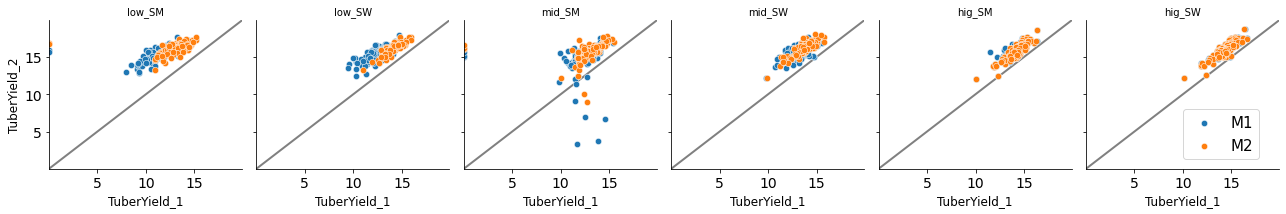

In [23]:
g = sns.FacetGrid(df, col="env_soil", hue='manag', height=3, col_order=['low_SM','low_SW','mid_SM','mid_SW','hig_SM','hig_SW'])
g.map(sns.scatterplot, "tyield_1", "tyield_2",zorder=2, s=40)
g.set_titles(row_template = '{row_name}',col_template = '{col_name}')

xmax=19.9
ymax=19.9
# Iterate thorugh each axis
for ax in g.axes.flat:
    ax.plot([0,xmax],[0,ymax],"-",color="grey", linewidth=2,zorder=1)
    ax.set_title(ax.get_title(),fontsize=10)
    ax.set_ylabel('TuberYield_2', fontsize='large')
    ax.set_xlabel('TuberYield_1', fontsize='large')
    ax.yaxis.set_tick_params(labelsize=14)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.set_xlim([0.01,19.9])
    ax.set_ylim([0.01,19.9])
    plt.legend(prop=dict(size=15),bbox_to_anchor=(0.5, 0.4), loc=2, borderaxespad=0.)
#plt.savefig(r'C:\Users\uqjojeda\Dropbox\APSIMPotato\Paper docs\Paper 1\NewSubmission\data\srad.png', dpi=300,bbox_inches='tight')

In [116]:
df2 = pd.read_csv(r'C:\Users\uqjojeda\Dropbox\RanjuPaper2\data\data2.csv')

In [117]:
t = df2.groupby(['variable']).max()
t

,model,soil,manag,env,env_soil,year,Model1,Model2,dev_var,rain_M1,rain_M2,dev_rain,irri_M1,irri_M2,dev_irri
variable,,,,,,,,,,,,,,,
Nleach,P1,SW,IrriManag2,mid,mid_SW,2020,76.6,25.4,3.5,943.2,943.4,211.8,430.0,495.0,245.0
drain,P1,SW,IrriManag2,mid,mid_SW,2020,353.4,281.6,27.6,943.2,943.4,211.8,430.0,495.0,245.0
es,P1,SW,IrriManag2,mid,mid_SW,2020,278.9,331.9,104.9,943.2,943.4,211.8,430.0,495.0,245.0
irri,P1,SW,IrriManag2,mid,mid_SW,2020,430.0,495.0,245.0,943.2,943.4,211.8,430.0,495.0,245.0
mat,P1,SW,IrriManag2,mid,mid_SW,2020,195.0,198.0,112.0,943.2,943.4,211.8,430.0,495.0,245.0
rain,P1,SW,IrriManag2,mid,mid_SW,2020,943.2,943.4,211.8,943.2,943.4,211.8,430.0,495.0,245.0
runoff,P1,SW,IrriManag2,mid,mid_SW,2020,238.9,247.4,28.2,943.2,943.4,211.8,430.0,495.0,245.0
tyield,P1,SW,IrriManag2,mid,mid_SW,2020,16.6,18.8,16.9,943.2,943.4,211.8,430.0,495.0,245.0


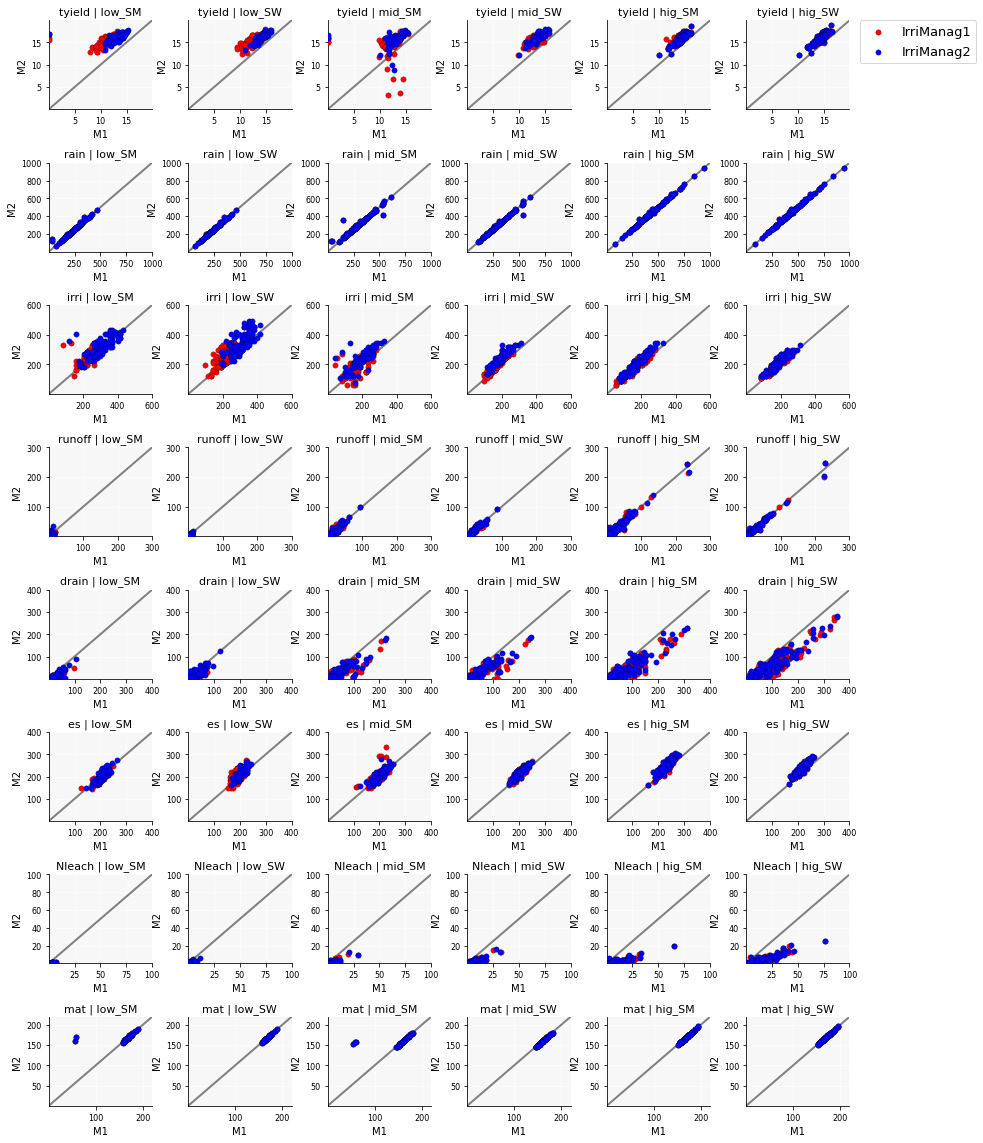

In [115]:
kwargs  =   {'edgecolor':"k"}
g = sns.FacetGrid(df2, col="env_soil", row='variable', hue='manag', height=2, palette=['red','blue'],
                  col_order=['low_SM','low_SW','mid_SM','mid_SW','hig_SM','hig_SW'],sharey=False,sharex=False)
g.map(sns.scatterplot, "Model1", "Model2",zorder=3, s=30,**kwargs,linewidth=0.2)
g.set_titles(row_template = '{row_name}',col_template = '{col_name}')

axis_max = [19.9,19.9,19.9,19.9,19.9,19.9,
                 1000,1000,1000,1000,1000,1000,
                 600,600,600,600,600,600,
                 300,300,300,300,300,300,
                 400,400,400,400,400,400, 
                 400,400,400,400,400,400,
                 100,100,100,100,100,100,
                 220,220,220,220,220,220]

for ax, amax in zip(g.axes.flat, axis_max):
    ax.set_xlim([0.01,amax])
    ax.set_ylim([0.01,amax])

line_position = [19.9,19.9,19.9,19.9,19.9,19.9,
                 1000,1000,1000,1000,1000,1000,
                 600,600,600,600,600,600,
                 300,300,300,300,300,300,
                 400,400,400,400,400,400, 
                 400,400,400,400,400,400,
                 100,100,100,100,100,100,
                 220,220,220,220,220,220]

for ax, pos in zip(g.axes.flat, line_position):
    ax.plot([0,pos],[0,pos],"-",color="grey", linewidth=2,zorder=2)

# Iterate thorugh each axis
for ax in g.axes.flat:
    ax.set_title(ax.get_title(),fontsize=11)
    ax.set_ylabel('M2', fontsize='medium')
    ax.set_xlabel('M1', fontsize='medium')
    ax.yaxis.set_tick_params(labelsize=8)
    ax.xaxis.set_tick_params(labelsize=8)
    plt.legend(prop=dict(size=13),bbox_to_anchor=(1.1, 12.2), loc=2, borderaxespad=0.)
    ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5,zorder=1)
    ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7,zorder=1)
    ax.patch.set_facecolor('0.97')

plt.subplots_adjust(wspace=0.35, hspace=0.6)
#plt.savefig(r'C:\Users\uqjojeda\Dropbox\APSIMPotato\Paper docs\Paper 1\NewSubmission\data\srad.png', dpi=300,bbox_inches='tight')

In [145]:
df2.dev_irri.describe()

count    11520.000000
mean        28.908333
std         33.385170
min       -100.000000
25%          5.000000
50%         20.000000
75%         50.000000
max        245.000000
Name: dev_irri, dtype: float64

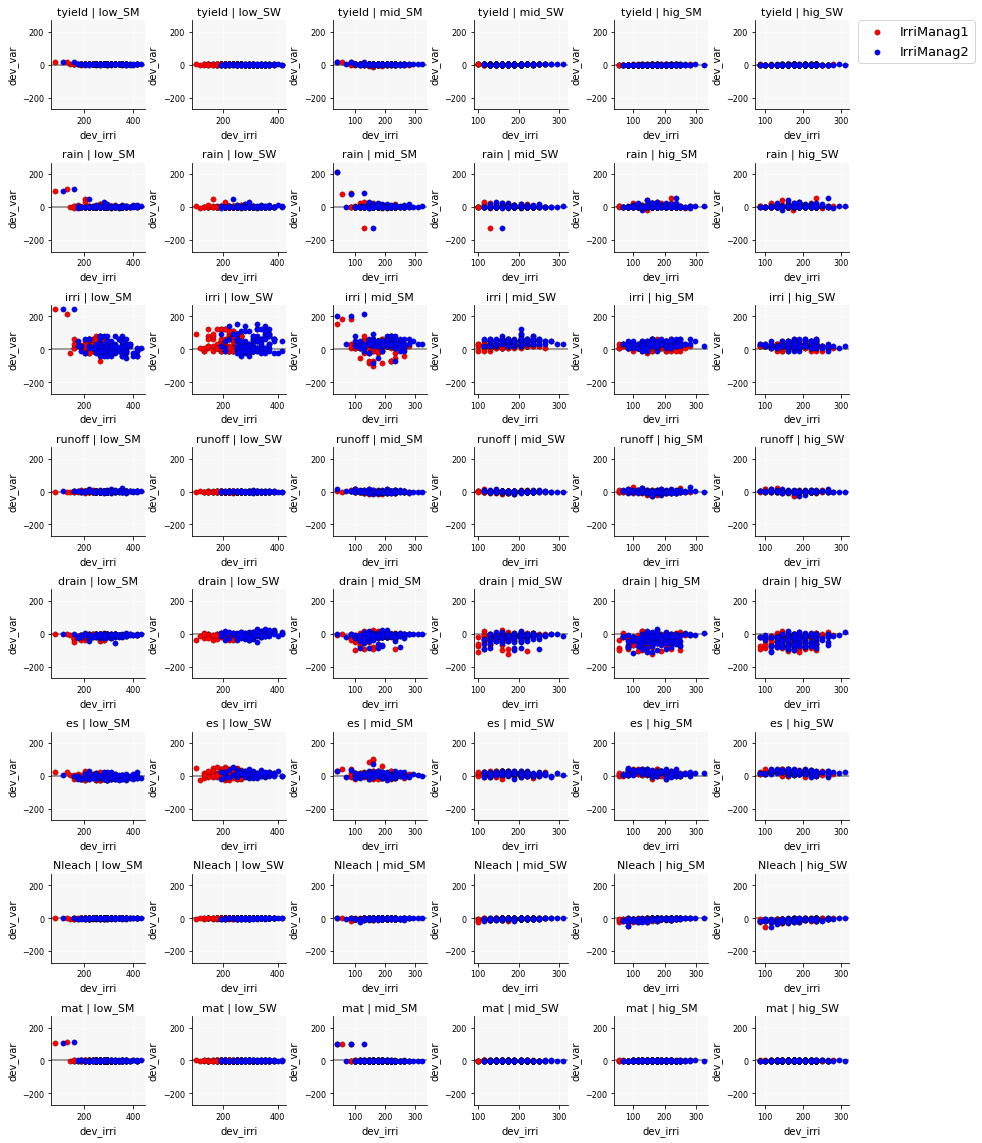

In [148]:
kwargs  =   {'edgecolor':"k"}
g = sns.FacetGrid(df2, col="env_soil", row='variable', hue='manag', height=2, palette=['red','blue'],
                  col_order=['low_SM','low_SW','mid_SM','mid_SW','hig_SM','hig_SW'],sharey=False,sharex=False)
g.map(sns.scatterplot, "irri_M1", "dev_var",zorder=3, s=30,**kwargs,linewidth=0.2)
g.set_titles(row_template = '{row_name}',col_template = '{col_name}')

axis_min = [-270,-270,-270,-270,-270,-270,
            -270,-270,-270,-270,-270,-270,
            -270,-270,-270,-270,-270,-270,
            -270,-270,-270,-270,-270,-270,
            -270,-270,-270,-270,-270,-270, 
            -270,-270,-270,-270,-270,-270,
            -270,-270,-270,-270,-270,-270,
            -270,-270,-270,-270,-270,-270]

axis_max = [270,270,270,270,270,270,
            270,270,270,270,270,270,
            270,270,270,270,270,270,
            270,270,270,270,270,270,
            270,270,270,270,270,270, 
            270,270,270,270,270,270,
            270,270,270,270,270,270,
            270,270,270,270,270,270]
    
for ax, amin in zip(g.axes.flat, axis_min):
    for ax, amax in zip(g.axes.flat, axis_max):
        ax.set_ylim([amin,amax])

# Iterate thorugh each axis
for ax in g.axes.flat:
    ax.set_title(ax.get_title(),fontsize=11)
    ax.set_ylabel('dev_var', fontsize='medium')
    ax.set_xlabel('dev_irri', fontsize='medium')
    ax.yaxis.set_tick_params(labelsize=8)
    ax.xaxis.set_tick_params(labelsize=8)
    plt.legend(prop=dict(size=13),bbox_to_anchor=(1.1, 12.2), loc=2, borderaxespad=0.)
    ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5,zorder=1)
    ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7,zorder=1)
    ax.patch.set_facecolor('0.97')
    ax.axhline(y=0, color='grey', linestyle='-')

plt.subplots_adjust(wspace=0.5, hspace=0.6)
#plt.savefig(r'C:\Users\uqjojeda\Dropbox\APSIMPotato\Paper docs\Paper 1\NewSubmission\data\srad.png', dpi=300,bbox_inches='tight')